# **菊安酱与菜菜的Python机器学习可视化**

## 第五期 组成图

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## <center>每周三晚上8点直播1小时，完整版2小时周日上线~</center>
## <center>单数周菜菜直播，双数周菊安酱直播，哔哩哔哩与peixun.net同步开启</center>

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

**注意：本篇中可能遇见无法在matpotlib和seaborn中显示中文或者负号的问题**  
如果你遇见了，请参考链接，可永久解决中文和负号问题：https://www.jianshu.com/p/914b5f4ce6bf  
或者你也可以在每次需要负号和中文的时候执行下面的代码来避免中文或负号显示不出来：

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

## **第五章 组成图 Composition**

组成图是描述样本类别组成的图像，它能够直观表达一组数据集中有什么样的类别，并展现出不同类别所占的比例<br>
组成图往往有绚丽的色彩，在某一类别占比很大的时候能够让该类别非常显眼，所以是商业报告&PPT最佳伴侣！<br>
典型的组成图有：人民群众最熟悉的饼图，树形图和华夫饼图

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E7%BB%84%E6%88%90%E5%9B%BE.PNG" align="center" />

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 31/50 华夫饼图

华夫饼图又叫做方形饼图(square chart)，是一种以方形饼图展示不同类别占比的组成图，通常为10x10网格，其中每个单元格代表1％的占比。 

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/31%20%E5%8D%8E%E5%A4%AB%E9%A5%BC%E5%9B%BE.PNG" align="center" />

没有横坐标和纵坐标  
只有标题和图例，从图例中可以看出，一种颜色一种类别  
三张图的类别分别是：Class(车辆类型)，Cyl(气缸数量)，Make(汽车制造商)  

### 1. 导入需要的绘图库&基本设置

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 认识绘制华夫饼的库

#### **pywaffle.waffle.Waffle**  
Python + 华夫饼的英文单词waffle形成的库pywaffle，是专门为matplotlib设计的，用来绘制一系列饼图的库  
其中的Waffle模块是专门绘制华夫饼图的，但神奇的是，我们不通过任何函数来实现这个功能  
这个库需要单独安装，大家可以运行以下代码进行安装：

In [77]:
%%cmd
pip install pywaffle

Microsoft Windows [Version 10.0.17134.648]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Pythonwork\micro-class 2 - virtualization\week5>pip install pywaffle

C:\Pythonwork\micro-class 2 - virtualization\week5>

In [2]:
#导入华夫饼库中的华夫饼图像类型
from pywaffle import Waffle

In [3]:
Waffle #pywaffle库，waffle模块中的Waffle图像类型

pywaffle.waffle.Waffle

In [4]:
type(Waffle) #本身就是一种类型

type

> **重要参数**
>> **FigureClass**：图像的类型，绘制华夫饼时我们在这里输入Waffle，这是我们导入后的Waffle图像类型  
>> **rows**：条形图在y轴上的起点，也就是长条的最下边  
>> **values**：条形图在y轴上的终点，也就是长条的最上边  
>> **loc**：图例的位置  
>> **bbox_to_anchor**：一种更加精确地显示图例位置的方式，当bbox_to_anchor参数存在时，会以参数中输入的坐标为参考点，再考虑loc来设置图图例的位置

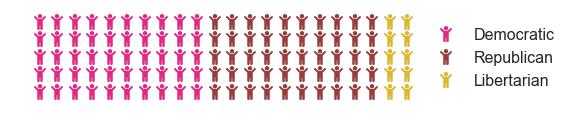

In [108]:
#先画一块饼看看吧

data = {'Democratic': 50, 'Republican': 50, 'Libertarian': 10} #数据集以字典的形式表示，这里表示三种类别

fig = plt.figure(
    figsize=(8,3), #画布的尺寸
    values=data, #数据
    FigureClass=Waffle,  #画布的类型：华夫饼图 - 没有横纵坐标，只有格子
    rows=5, #华夫饼图要有多少行
    colors=("#E22882", "#983D3D", "#DCB732"), #颜色的数量必须要与数据中的类别数量一致，否则报错
    legend={'loc': 'upper left' #图例输入loc，可以控制图例所在的位置
            , 'bbox_to_anchor': (1, 1) #元组
           },
    icons='child', icon_size=16, 
    icon_legend=True
)

#loc与bbox_to_anchor用法梳理
#plt.scatter([1],[1]
#            ,zorder=2 #图层的位置
#            ,c="k");

### bbox_to_anchor用法梳理

bbox_to_anchor = (0.5, 0.5)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/bbox_to_anchor%E7%94%A8%E6%B3%952.png" align="center" />

bbox_to_anchor = (0.5, 0.5, 0.1, 0.4)

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/bbox_to_anchor%E7%94%A8%E6%B3%951.png" align="center" />

华夫饼图的数据一定得输入百分比吗？其实不一定~

### 3. 处理绘图用的数据

In [77]:
#导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [78]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [22]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
        ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，所以这个数值越大代表汽车越节能

我们需要向华夫饼图输入类别和类别对应的数量  
df_class = df_raw.groupby('class').size().reset_index(name='counts')

In [83]:
df_raw.groupby("class").size() #提取出按照class来聚合之后每个类别下的样本数量

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

In [84]:
df_raw.groupby("class").size().reset_index() #重新设立索引，并且将原来为索引的内容当作另一个特征放到DataFrame

,class,0
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [85]:
df_class = df_raw.groupby('class').size().reset_index(name='counts')

In [86]:
df_class #按照车辆的类型聚合出来的全部数据，每个车辆类型下的样本计数

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


使用光谱和列表推倒式准备颜色  
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

In [87]:
plt.cm.inferno_r(0.5) #RGBA

(0.729909, 0.212759, 0.333861, 1.0)

In [88]:
n_categories = df_class.shape[0]
n_categories #车辆有7种类型

7

In [57]:
for i in range(n_categories):
    print(plt.cm.inferno_r(i/float(n_categories)))

(0.988362, 0.998364, 0.644924, 1.0)
(0.981173, 0.759135, 0.156863, 1.0)
(0.961293, 0.488716, 0.084289, 1.0)
(0.832299, 0.283913, 0.257383, 1.0)
(0.621685, 0.164184, 0.388781, 1.0)
(0.397674, 0.083257, 0.433183, 1.0)
(0.15585, 0.044559, 0.325338, 1.0)


In [89]:
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
colors

[(0.988362, 0.998364, 0.644924, 1.0),
 (0.981173, 0.759135, 0.156863, 1.0),
 (0.961293, 0.488716, 0.084289, 1.0),
 (0.832299, 0.283913, 0.257383, 1.0),
 (0.621685, 0.164184, 0.388781, 1.0),
 (0.397674, 0.083257, 0.433183, 1.0),
 (0.15585, 0.044559, 0.325338, 1.0)]

依然列表推倒式，准备图例  
[n[1] for n in df_class.itertuples()]

In [92]:
df_class["class"].values.tolist()

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [61]:
df_class

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [94]:
#itertuples：将一个dataframe的行当作元祖来进行循环的函数，有点类似与lambda，都是对DataFrame中的每行/每列中的对象进行操作
[*df_class.itertuples()]

[Pandas(Index=0, _1='2seater', counts=5),
 Pandas(Index=1, _1='compact', counts=47),
 Pandas(Index=2, _1='midsize', counts=41),
 Pandas(Index=3, _1='minivan', counts=11),
 Pandas(Index=4, _1='pickup', counts=33),
 Pandas(Index=5, _1='subcompact', counts=35),
 Pandas(Index=6, _1='suv', counts=62)]

In [95]:
for n in df_class.itertuples():
    print(n)
#元祖中有三个对象：索引，第一列“车辆类型”，第二列“计数”

Pandas(Index=0, _1='2seater', counts=5)
Pandas(Index=1, _1='compact', counts=47)
Pandas(Index=2, _1='midsize', counts=41)
Pandas(Index=3, _1='minivan', counts=11)
Pandas(Index=4, _1='pickup', counts=33)
Pandas(Index=5, _1='subcompact', counts=35)
Pandas(Index=6, _1='suv', counts=62)


In [96]:
n

Pandas(Index=6, _1='suv', counts=62)

In [97]:
n[0]

6

In [98]:
n[1]

'suv'

In [99]:
n[2]

62

In [100]:
[n[1] for n in df_class.itertuples()]

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [73]:
#其实完全没必要
df_class["class"].values.tolist()

['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [110]:
#数据准备（占比，颜色以及标签）

#按车辆类型
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
#colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]
colors_class = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)] #更换成了更容易查看的颜色
labels_class = [n[1] for n in df_class.itertuples()] #更加简单的写法

#按气缸数量
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
#colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]
colors_cyl = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_cyl = [n[1] for n in df_cyl.itertuples()]

#按制造商
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
#colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]
colors_make = [plt.cm.nipy_spectral(i/float(n_categories)) for i in range(n_categories)]
labels_make = [n[1] for n in df_make.itertuples()]

### 4. 绘制华夫饼图

plots = {"图像位置":{"每一个和华夫饼有关的参数":参数的值}}

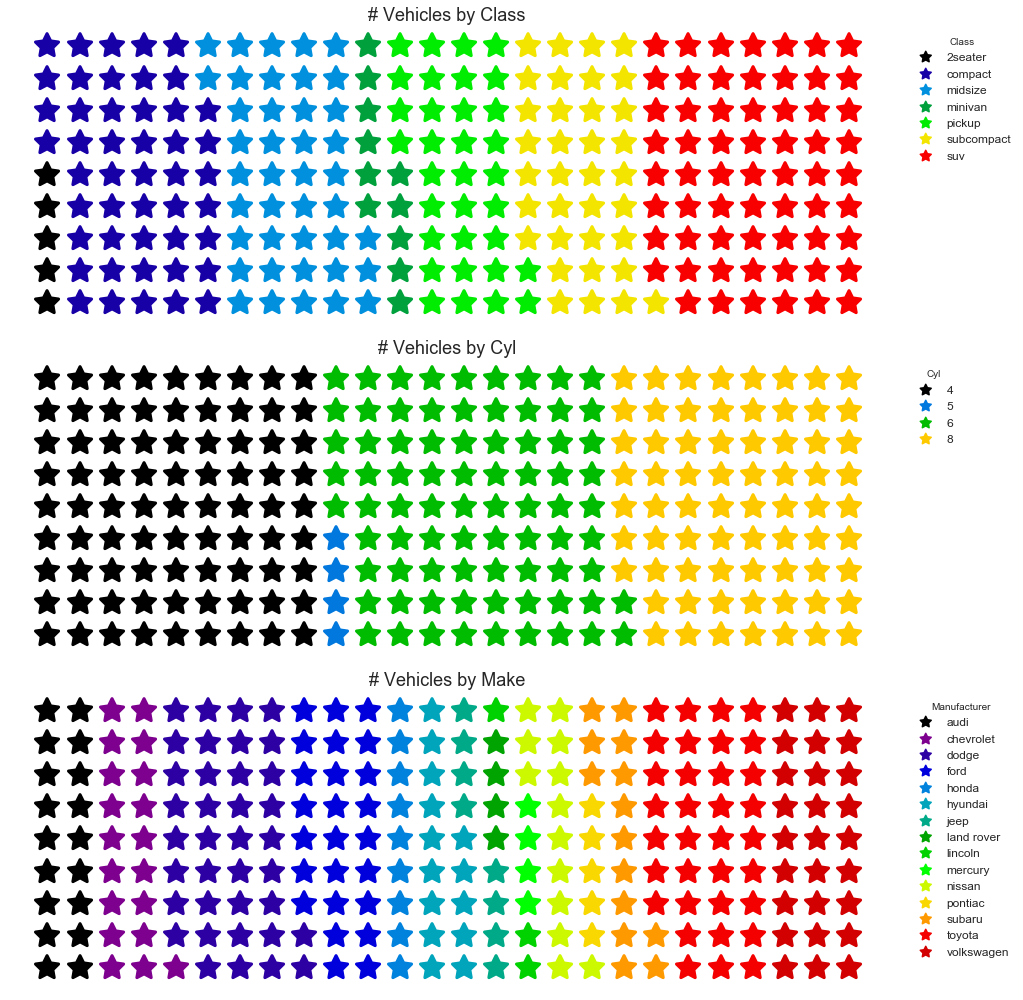

In [119]:
#绘图
fig = plt.figure(
    FigureClass=Waffle, #绘制华夫饼图
    plots={ #绘制多个图像
        '311': #这里的数字表示，3行，1列，索引为1的图
        {'values': df_class['counts_class'], #数据集
         'labels': labels_class, #标签
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
         'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
         'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': labels_cyl,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': labels_make,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make,    
        }
    },
    rows=9, #华夫饼图有多少行
    figsize=(16, 14),
    icons='star', icon_size=25, 
    icon_legend=True
)

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

在使用icon时，你可能会遇见报错的情况：

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/mistake.PNG" align="center" />

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/mistake2.PNG" align="center" />

**如果你出现类似的报错，请参考下面的步骤解决问题：**  
  
**1. 进入网址：https://fontawesome.com/download**  
**2. 点击Free for Desktop进行下载**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Sketch001.jpg" align="center" />

**3. 找到fontawesome-free-5.8.1-desktop文件夹，点击进入，找到文件夹otfs中的文件：**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E4%B8%89%E4%B8%AA%E6%96%87%E4%BB%B6.PNG" align="center" />

**4. 把三个otf文件复制到你的Python安装目录的字体文件夹下：C:\Python\Lib\site-packages\font**

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E7%BB%93%E6%9E%9C.PNG" align="center" />

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 5. 解读图像 & 华夫饼图展开

二分类的华夫饼：常用于企业KPI数据，完成任务了么？完成了多少？

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Waffle-Chart-in-Excel-Example.png" align="center" />

>华夫饼适合什么时候用呢？
>> 比较许多同一层级的不同类型，并探索这些类型如何对整体做出贡献  
>> 整体中的某一部分占比巨大  
>> 使用KPI图表作为总数的百分比  

> 什么时候不应该用华夫饼？
>> 当对整体有贡献的类别太多的时候，华夫饼图能够展现的组成情况有限  
>> 测量的KPI或者总贡献可以超过100%时  
>> 华夫饼展现出“大概的比例”，当精确的占比（比如百分比数量）非常重要的时候，必须借助文字帮助

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 32/50 饼图

饼图是最典型的组成图，是我们可能除了条形图、折线图之外最熟悉的图像——没有横纵坐标，只有饼和图例文字

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/Pie%20Chart.PNG" align="center" />

思考：你会怎样绘制这样一张图呢？

### 1. 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [2]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

输入的数据

In [3]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
df = df_raw.groupby('class').size().reset_index(name='counts')
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


### 3. 认识绘制饼图的函数

#### ax.pie/plt.pie

> x：pie函数中唯一的必填参数，每个类别的计数  
> autopct：设定写在扇叶上的百分比，默认None，可以输入None或者format函数表示的字符串

In [55]:
data = df['counts'] #需要输入的数据集

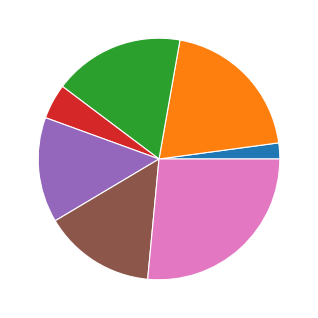

In [56]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data); #autopct=None

TypeError: autopct must be callable or a format string

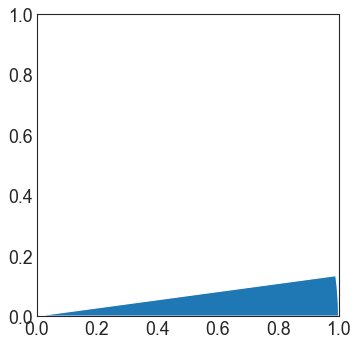

In [66]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct=[1,2,3,4,5,6,7]);

In [63]:
"我想显示的格式{}".format(53)

'我想显示的格式53'

In [64]:
"The amount is:{}".format(26)

'The amount is:26'

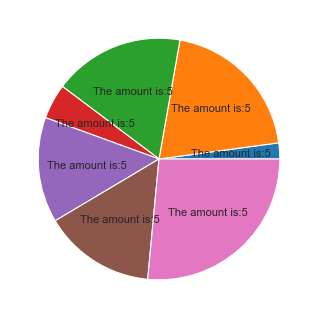

In [65]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct="The amount is:{}".format(5));

In [ ]:
#lambda x: 在一个序列当中，对每一个元素分别进行操作

In [85]:
df.counts

0     5
1    47
2    41
3    11
4    33
5    35
6    62
Name: counts, dtype: int64

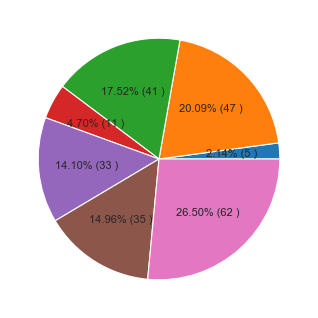

In [97]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
ax.pie(data, autopct=lambda x:"{:.2f}% ({} )".format(x,int(x/100*df.counts.sum())));

In [52]:
#你注意到如果使用匿名函数，每个x是什么了吗？

In [73]:
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [91]:
ratio = df.loc[0,"counts"]*100/df.counts.sum()

In [75]:
#ratio = 每个类别下的计数/所有类别下的样本总数
ratio = df.loc[0,"counts"]*100/(df.counts.sum())

In [93]:
int(ratio/100 * df.counts.sum())

5

In [ ]:
#"{比例}({计数})".format(比例，比例*样本总数/100)
"{:.1f}% ({:d})".format(ratio,int(ratio/100*(df.counts.sum())

In [ ]:
#在我们绘制饼图的函数中，参数autopct帮助我们计算各类的比例，我们可以使用lambda函数来替代索引
#autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data)))

#### 为什么说绘制饼图是处于使用函数和使用对象之间？

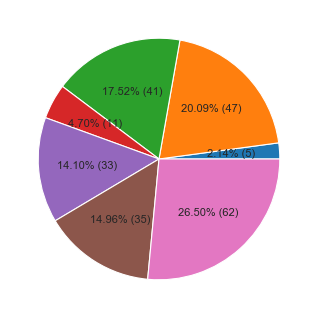

In [99]:
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
wedges, texts, autotexts = ax.pie(x=data,
                                  autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data))))

In [59]:
#### 生成的wedges，texts和autotexts都是什么？

In [100]:
wedges #七个扇叶，每个都是一个补丁对象

In [101]:
texts #七个扇叶分别的位置

[Text(1.0975225342306456, 0.07378541086109972, ''),
 Text(0.7933226822456274, 0.7619967990973475, ''),
 Text(-0.40383832372764283, 1.023188451991542, ''),
 Text(-0.9670509719865016, 0.5242255407550863, ''),
 Text(-1.0951459098588818, -0.10322517192701731, ''),
 Text(-0.5879123013284802, -0.9297091620214627, ''),
 Text(0.7404231332579032, -0.8134946734530898, '')]

In [102]:
autotexts #七个扇叶所对应的文字

[Text(0.5986486550348976, 0.04024658774241802, '2.14% (5)'),
 Text(0.43272146304306947, 0.41563461768946225, '20.09% (47)'),
 Text(-0.22027544930598697, 0.5581027919953864, '17.52% (41)'),
 Text(-0.5274823483562735, 0.28594120404822887, '4.70% (11)'),
 Text(-0.5973523144684809, -0.05630463923291852, '14.10% (33)'),
 Text(-0.3206794370882619, -0.5071140883753432, '14.96% (35)'),
 Text(0.4038671635952199, -0.44372436733804893, '26.50% (62)')]

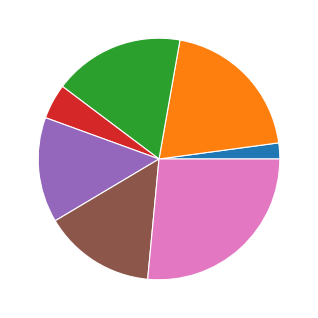

In [104]:
#当参数autopct等于None的时候
fig, ax = plt.subplots(figsize=(5, 5), dpi= 80)
wedges, texts = ax.pie(data);

### 4. 代码解读

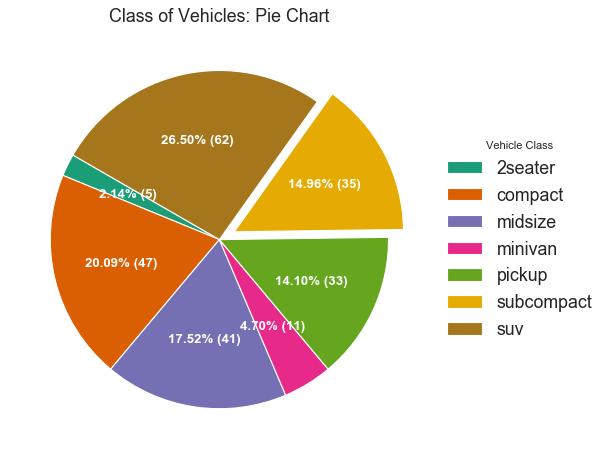

In [121]:
#数据准备
data = df['counts'] #需要输入的数据集
explode = [0,0,0,0,0,0.1,0]

#绘制图像
fig, ax = plt.subplots(figsize=(7, 7), dpi= 80)

wedges, texts, autotexts = ax.pie(x=data,
                                   autopct=lambda x: "{:.2f}% ({:d})".format(x,int(x/100.*np.sum(data))),
                                   colors=plt.cm.Dark2.colors, #图形的颜色
                                   startangle=150, #第一瓣扇叶从什么角度开始
                                   explode=explode #扇叶与扇叶之间的距离
                                  )

#装饰图像
categories = df['class'] #选取图例
ax.legend(categories #输入数据
          , title="Vehicle Class" #图例的标题
          , loc="center left"
          , bbox_to_anchor=(1, 0, 0.5, 1) #还记得bbox_to_anchor的用法么？
         ) 
ax.set_title("Class of Vehicles: Pie Chart")
plt.setp(autotexts, size=12, weight=700, color="w"
        ) #设置某个对象(Artist)的属性(Property)
plt.show()

#### **颜色**

In [110]:
colors=plt.cm.Dark2.colors
colors #RGB

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4))

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 33/50 树型图

树形图是使用一个矩形中的区域来表示类别组成的图像，它与饼图，华夫饼图非常相似，没有横纵坐标，只有色块和文字。  
树形图中，一个色块代表一种类别，我们需要提供给树形图函数的信息是：类别，类别的数量，类别的颜色。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E6%A0%91%E5%BD%A2%E5%9B%BE.PNG" align="center" />

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [2]:
%%cmd
pip install squarify

Microsoft Windows [Version 10.0.17134.706]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Pythonwork\micro-class 2 - virtualization\week5>pip install squarify

C:\Pythonwork\micro-class 2 - virtualization\week5>

In [3]:
import squarify #专业绘制树形图

In [4]:
#导入数据，准备数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw.groupby('class').size().reset_index(name='counts')

In [24]:
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [20]:
"a" + "b"

'ab'

In [22]:
#车辆类型 + 转行符 ( + 车辆类型所对应的样本数量 + )
str(df.iloc[0,:][0]) + "\n (" + str(df.iloc[0,:][1]) + ")"

'2seater\n (5)'

In [18]:
df.iloc[0,:][1]

5

In [25]:
df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")"
         ,axis=1) #对每一行进行操作

0        2seater\n (5)
1       compact\n (47)
2       midsize\n (41)
3       minivan\n (11)
4        pickup\n (33)
5    subcompact\n (35)
6           suv\n (62)
dtype: object

In [26]:
df.shape[0]

7

In [27]:
[plt.cm.Spectral(i/float(df.shape[0])) for i in range(df.shape[0])]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0)]

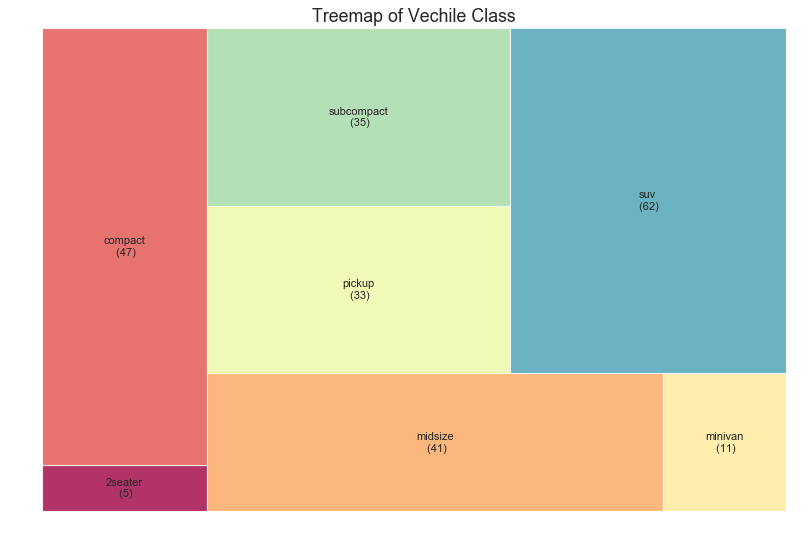

In [29]:
#绘制图像
plt.figure(figsize=(12,8), dpi= 80) #建立画布
squarify.plot(sizes=df.counts #输入图像的值（占比,数量）
              , label=df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")",axis=1) #图像中的注解
              , color=[plt.cm.Spectral(i/float(df.shape[0])) for i in range(df.shape[0])]
              , alpha=.8 #透明度
             )

#装饰图像
plt.title('Treemap of Vechile Class')
plt.axis('off') #不显示坐标轴，还记得我们在绘制坡度图的时候如何设置不显示坐标轴么？当时我们全程是fig + ax的操作。
plt.show()

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

### 34/50 条形图

条形图是最常见的图像之一。通常我们使用条形图，我们会考虑两个特征，以表达趋势，进行对比（就像我们在排序图中做的那样）。  
但事实上，条形图作为一种简单的几何图像，也可以表示为组成图像。  
当我们以不同车辆名称为横坐标，不同车辆名称下的样本数量为纵坐标，即可看出整个数据集中，每个车辆品牌所占的样本数量。  
比起饼图或者华夫饼图，条形图在类别很多的时候有天生的优势——即便有很多类别，也能够显示得非常清楚。

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week5%20Composition/%E6%9D%A1%E5%BD%A2%E5%9B%BE.PNG" align="center" />

### 1. 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

### 2. 导入数据，准备数据

In [2]:
#导入数据，准备数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [3]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')

In [5]:
df

,manufacturer,counts
0,audi,18
1,chevrolet,19
2,dodge,37
3,ford,25
4,honda,9
5,hyundai,14
6,jeep,8
7,land rover,4
8,lincoln,3
9,mercury,4


#### **建立颜色列表的新方式**

In [6]:
#我们一直以来都使用光谱来进行取色，或者输入颜色的名字，还有其他方法么？

import random #控制随机模式的模块

In [8]:
all_colors = list(plt.cm.colors.cnames.keys())

In [9]:
all_colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [64]:
df['manufacturer'].unique().__len__()

15

In [65]:
df.shape[0]

15

In [20]:
random.seed(100) #设置随机数种子
n = df['manufacturer'].unique().__len__() #需要取出多少种颜色？
c = random.choices(all_colors, k=n) #random.choice，从一个列表中取出k个值

In [59]:
plt.cm.colors.cnames.keys() #显示所有可能使用到的颜色的名字

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [21]:
c

['darkblue',
 'lightblue',
 'peru',
 'olivedrab',
 'palegoldenrod',
 'lavenderblush',
 'purple',
 'lightslategray',
 'brown',
 'lightblue',
 'black',
 'teal',
 'tomato',
 'gainsboro',
 'firebrick']

### 3. 代码解析&图像解读

In [41]:
df

,manufacturer,counts
0,audi,18
1,chevrolet,19
2,dodge,37
3,ford,25
4,honda,9
5,hyundai,14
6,jeep,8
7,land rover,4
8,lincoln,3
9,mercury,4


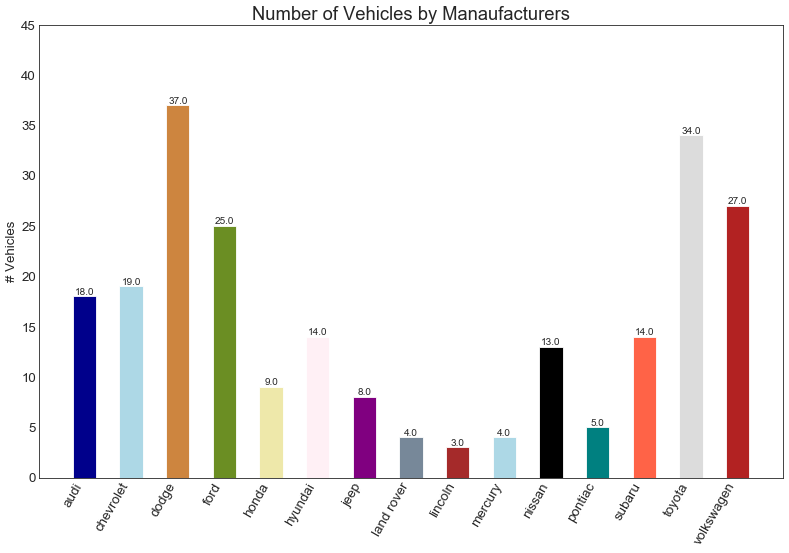

In [32]:
#绘制图像
plt.figure(figsize=(16,10), dpi= 60)
plt.bar(df['manufacturer'] #横坐标
        , df['counts'] #纵坐标
        , color=c
        , width=0.5)

#柱状图上写上文字
for i, val in enumerate(df['counts'].values):
    plt.text(i, val #横纵坐标定义位置
             , float(val) #在这个位置显示的文字内容
             , horizontalalignment='center' #定义的位置在文字的左右哪边
             , verticalalignment='bottom' #定义的位置在文字的上下什么方位
             , fontdict={'fontweight':500, 'size':12})

#装饰图像
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

In [25]:
[*enumerate(df['counts'].values)]

[(0, 18),
 (1, 19),
 (2, 37),
 (3, 25),
 (4, 9),
 (5, 14),
 (6, 8),
 (7, 4),
 (8, 3),
 (9, 4),
 (10, 13),
 (11, 5),
 (12, 14),
 (13, 34),
 (14, 27)]

<img src="https://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />